In [47]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold, GridSearchCV 
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# будем отображать графики прямо в jupyter'e
%pylab inline

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


/Users/antonio/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f', 'clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [48]:
df = pandas.read_csv('titanik.csv', index_col='PassengerId')
df = df[["Pclass", "Fare", "Age", "Sex", "Survived"]]
df.head()

,Pclass,Fare,Age,Sex,Survived
PassengerId,,,,,
1,3,7.2500,22.0,male,0
2,1,71.2833,38.0,female,1
3,3,7.9250,26.0,female,1
4,1,53.1000,35.0,female,1
5,3,8.0500,35.0,male,0


In [49]:
print(len(df))
df.dropna(inplace=True)
print(len(df))
y = df["Survived"]

891
714


In [50]:
df.Sex = df.Sex.map(lambda s: True if s == "male" else False)
df.head()

,Pclass,Fare,Age,Sex,Survived
PassengerId,,,,,
1,3,7.2500,22.0,True,0
2,1,71.2833,38.0,False,1
3,3,7.9250,26.0,False,1
4,1,53.1000,35.0,False,1
5,3,8.0500,35.0,True,0


In [51]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=241)
clf.fit(df[["Pclass", "Fare", "Age", "Sex"]], y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=241,
            splitter='best')

[ 0.14000522  0.30343647  0.2560461   0.30051221]


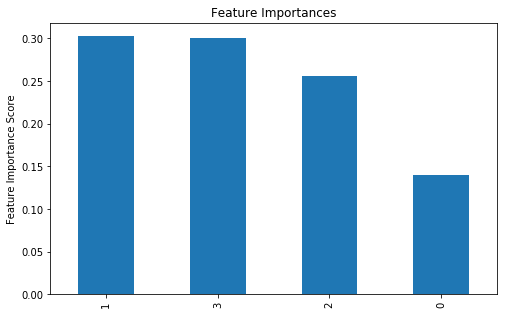

In [52]:
print(clf.feature_importances_)
feat_imp = pd.Series(clf.feature_importances_).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')